          RIAGENDR       PAQ605       BMXBMI       LBXGLU       DIQ010  \
count  2278.000000  2278.000000  2278.000000  2278.000000  2278.000000   
mean      1.511414     1.822651    27.955180    99.553117     2.016242   
std       0.499979     0.398918     7.248962    17.889834     0.185556   
min       1.000000     1.000000    14.500000    63.000000     1.000000   
25%       1.000000     2.000000    22.800000    91.000000     2.000000   
50%       2.000000     2.000000    26.800000    97.000000     2.000000   
75%       2.000000     2.000000    31.200000   104.000000     2.000000   
max       2.000000     7.000000    70.100000   405.000000     3.000000   

            LBXGLT        LBXIN  
count  2278.000000  2278.000000  
mean    114.978929    11.834794  
std      47.061239     9.718812  
min      40.000000     0.140000  
25%      87.000000     5.860000  
50%     105.000000     9.040000  
75%     130.000000    14.440000  
max     604.000000   102.290000  
<class 'pandas.core.frame.D

<Axes: >

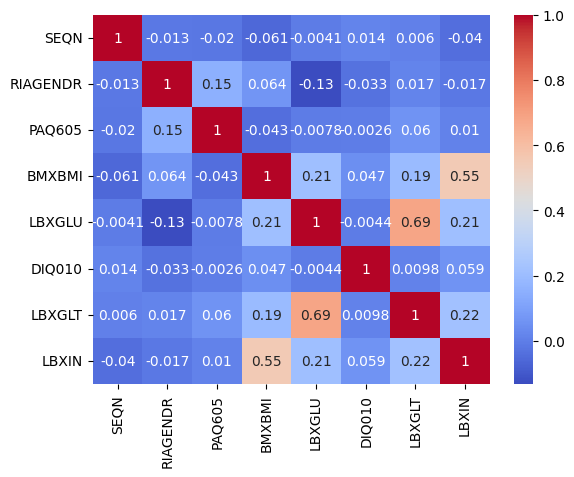

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data=pd.read_csv("/content/NHANES_age_prediction.csv")
data.drop(columns=['RIDAGEYR', 'SEQN'], inplace=True)
print(data.describe())
print(data.info())
data[['RIAGENDR', 'PAQ605','DIQ010']] = data[['RIAGENDR', 'PAQ605','DIQ010']].astype('int64')
count_missing = data.isnull().sum()
gender_frequencies=[data['RIAGENDR'].value_counts()]
age_frequencies=[data['age_group'].value_counts()]
activity_frequencies=[data['PAQ605'].value_counts()]
diabetes_frequencies=[data['DIQ010'].value_counts()]
print(gender_frequencies, age_frequencies, activity_frequencies, diabetes_frequencies)
sns.histplot(data['BMXBMI'])
plt.show()
sns.histplot(data['LBXGLU'])
plt.show()
sns.histplot(data['LBXGLT'])
plt.show()
sns.histplot(data['LBXIN'])
plt.show()
correlation_matrix= data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import joblib
stratify_column = data['age_group']
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=13)
for train_index, test_index in stratified_split.split(data, stratify_column):
    X_train = data.iloc[train_index]
    X_test = data.iloc[test_index]
X=X_train.drop(columns=['age_group'])
Y=X_train['age_group']

LR=LogisticRegression(random_state=13, max_iter=1000, class_weight={'Adult':1, 'Senior':6}).fit(X, Y)
x_test=X_test.drop(columns=['age_group'])
y_test=X_test['age_group']
y_pred=LR.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report)

joblib.dump(LR, 'LR.pkl')

Accuracy: 0.6857
Classification Report:
               precision    recall  f1-score   support

       Adult       0.93      0.67      0.78       575
      Senior       0.30      0.74      0.43       109

    accuracy                           0.69       684
   macro avg       0.62      0.71      0.61       684
weighted avg       0.83      0.69      0.73       684



['LR.pkl']

In [71]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
stratify_column = data['age_group']
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=13)
for train_index, test_index in stratified_split.split(data, stratify_column):
    X_train = data.iloc[train_index]
    X_test = data.iloc[test_index]
X=X_train.drop(columns=['age_group'])
Y=X_train['age_group']
svm = SVC(kernel='linear', class_weight={'Adult':1, 'Senior':5})
svm=svm.fit(X, Y)
x_test=X_test.drop(columns=['age_group'])
y_test=X_test['age_group']
y_pred=svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report)
joblib.dump(svm, 'SVM.pkl')

Accuracy: 0.7485
Classification Report:
               precision    recall  f1-score   support

       Adult       0.90      0.79      0.84       575
      Senior       0.32      0.51      0.39       109

    accuracy                           0.75       684
   macro avg       0.61      0.65      0.62       684
weighted avg       0.80      0.75      0.77       684



['SVM.pkl']

In [69]:

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


X=data.drop(columns=['age_group'])
y=data['age_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
catboost_model = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.1, loss_function='Logloss', class_weights={'Adult':1, 'Senior':3})
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10, verbose=10)
y_pred = catboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', report)
joblib.dump(catboost_model, 'catboost_model.pkl')

0:	learn: 0.6753544	test: 0.6781068	best: 0.6781068 (0)	total: 1.4ms	remaining: 138ms
10:	learn: 0.5854397	test: 0.6006100	best: 0.6006100 (10)	total: 11.9ms	remaining: 96.4ms
20:	learn: 0.5487596	test: 0.5759101	best: 0.5759101 (20)	total: 23ms	remaining: 86.4ms
30:	learn: 0.5302629	test: 0.5637898	best: 0.5637898 (30)	total: 31.6ms	remaining: 70.3ms
40:	learn: 0.5183596	test: 0.5597417	best: 0.5594883 (39)	total: 40.3ms	remaining: 57.9ms
50:	learn: 0.5106312	test: 0.5549967	best: 0.5549967 (50)	total: 48.8ms	remaining: 46.9ms
60:	learn: 0.5022706	test: 0.5555001	best: 0.5543274 (53)	total: 57.9ms	remaining: 37ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.5543273654
bestIteration = 53

Shrink model to first 54 iterations.
Accuracy: 0.8114
Classification Report:
               precision    recall  f1-score   support

       Adult       0.89      0.88      0.89       382
      Senior       0.42      0.45      0.43        74

    accuracy                         

['catboost_model.pkl']